# Рубежный контроль №1

## Мурзин В.В., ИУ5Ц-81Б
## Вариант 28, набор данных №4

### Тема: Технологии разведочного анализа и обработки данных.


1. Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

2. Для заданного набора данных постройте основные графики, входящие в этап
разведочного анализа данных. В случае наличия пропусков в данных удалите
строки или колонки, содержащие пропуски. Какие графики Вы построили и
почему? Какие выводы о наборе данных Вы можете сделать на основании
построенных графиков?


Данные: https://www.kaggle.com/carlolepelaars/toy-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('toy_dataset.csv.zip', compression='zip')

In [3]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
df['IncomeP'] = pd.qcut(df.Income, 3, ['low', 'middle', 'high'])

In [5]:
df = df.set_index('Number')

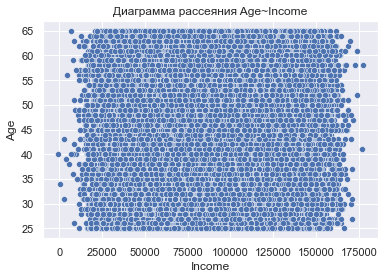

In [6]:
sns.scatterplot(data=df, y="Age", x="Income")
plt.title('Диаграмма рассеяния Age~Income');

Text(0.5, 1.0, 'Пропущенные значения отсутствуют')

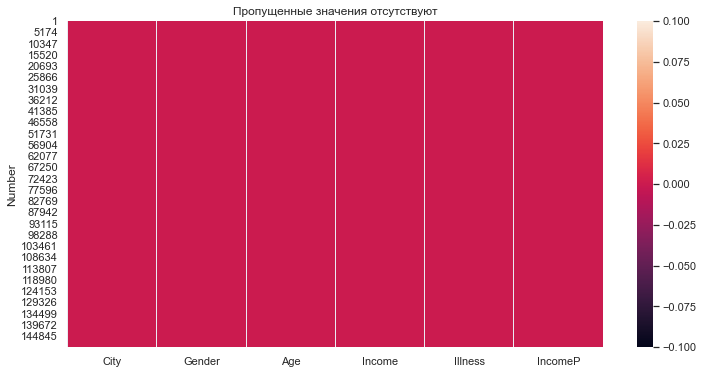

In [7]:
## Разведочный анализ данных

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna())
plt.title('Пропущенные значения отсутствуют')

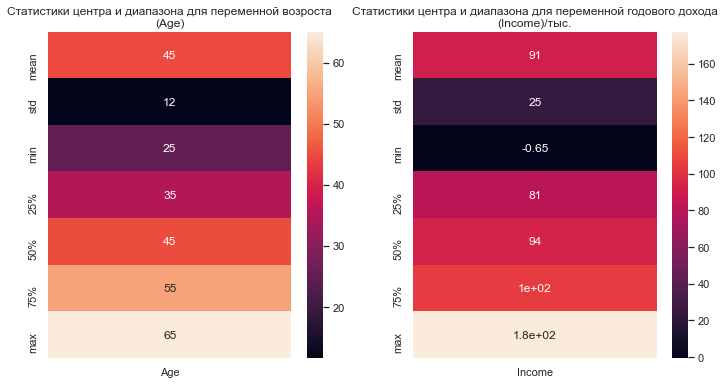

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(pd.DataFrame(df.describe().T.iloc[:,1:].T['Age']), annot=True)
plt.title('Статистики центра и диапазона для переменной возроста\n(Age)')

plt.subplot(122)
sns.heatmap(pd.DataFrame(df.describe().T.iloc[:,1:].T['Income']/1000), annot=True)
plt.title('Статистики центра и диапазона для переменной годового дохода\n(Income)/тыс.');

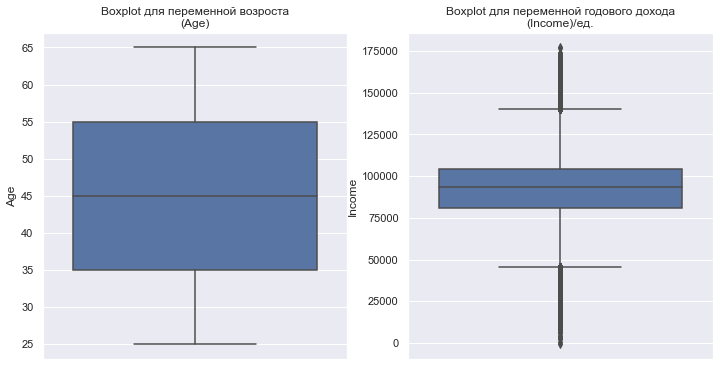

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(y = 'Age', data=df)
plt.title('Boxplot для переменной возроста\n(Age)')

plt.subplot(122)
sns.boxplot(y = 'Income', data=df)
plt.title('Boxplot для переменной годового дохода\n(Income)/ед.');

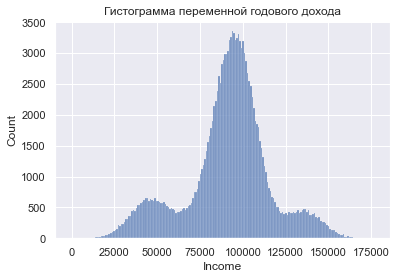

In [10]:
sns.histplot(x = 'Income', data = df);
plt.title('Гистограмма переменной годового дохода');

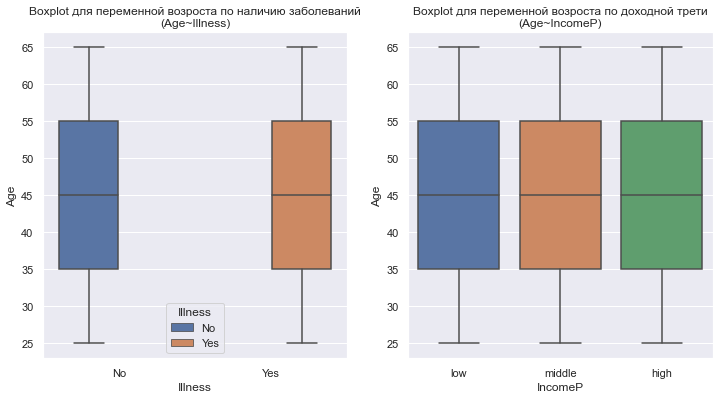

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(y = 'Age', data=df, x = 'Illness', hue='Illness')
plt.title('Boxplot для переменной возроста по наличию заболеваний\n(Age~Illness)');

plt.subplot(122)
sns.boxplot(y = 'Age', data=df, x = 'IncomeP')
plt.title('Boxplot для переменной возроста по доходной трети\n(Age~IncomeP)');

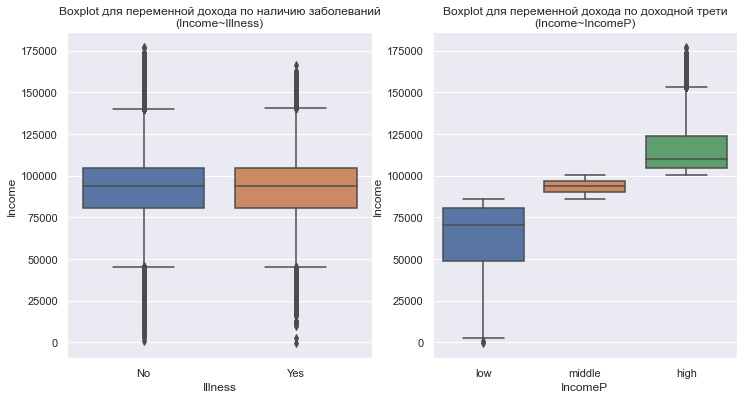

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(y = 'Income', data=df, x = 'Illness')
plt.title('Boxplot для переменной дохода по наличию заболеваний\n(Income~Illness)');

plt.subplot(122)
sns.boxplot(y = 'Income', data=df, x = 'IncomeP')
plt.title('Boxplot для переменной дохода по доходной трети\n(Income~IncomeP)');

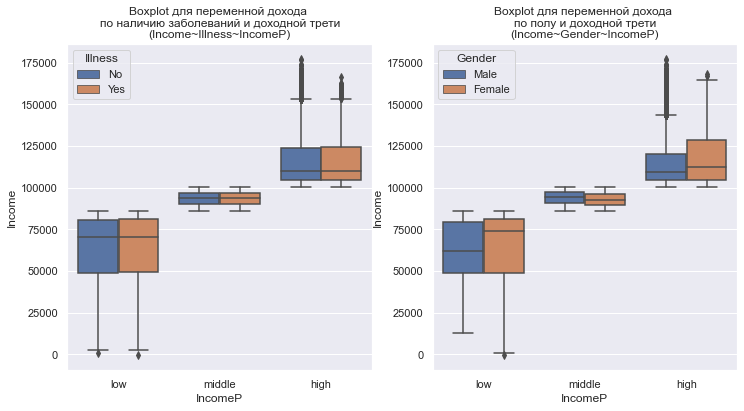

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(y = 'Income', data=df, x = 'IncomeP', hue = 'Illness')
plt.title('Boxplot для переменной дохода \nпо наличию заболеваний и доходной трети\n(Income~Illness~IncomeP)');

plt.subplot(122)
sns.boxplot(y = 'Income', data=df, x = 'IncomeP', hue = 'Gender')
plt.title('Boxplot для переменной дохода \nпо полу и доходной трети\n(Income~Gender~IncomeP)');

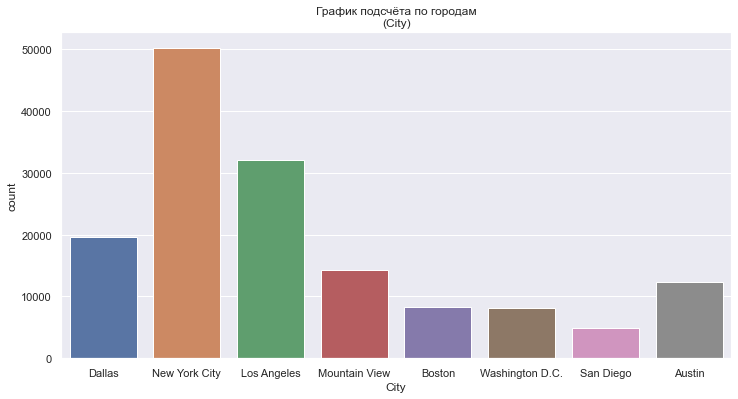

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x="City", data=df)
plt.title('График подсчёта по городам\n(City)');